In [1]:
import numpy as np

Linear Regression

In [27]:
class Linear_Regression:

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    #number of training examples & number of features
    self.m, self.n = X.shape

    #initializaing the wait and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    #calculate gradient

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = -2 * np.sum(self.Y -Y_prediction) / self.m

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self,X):
    return X.dot(self.w) + self.b

Using Linear Model for Prediction


In [3]:
#importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Preprocessing

In [4]:
salary_data = pd.read_csv('salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the features and target

In [9]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [22]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into Training and Test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=2)

Training the Linear Regression Model

In [28]:
model = Linear_Regression(learning_rate= 0.02, no_of_iterations=1000)

In [29]:
model.fit(X_train, Y_train)

In [30]:
#printing the parameter value
print("weight = ",model.w[0])
print("bias = ",model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the salary value for test data

In [31]:
test_data_prediction = model.predict(X_test)

In [32]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted value and the actual value

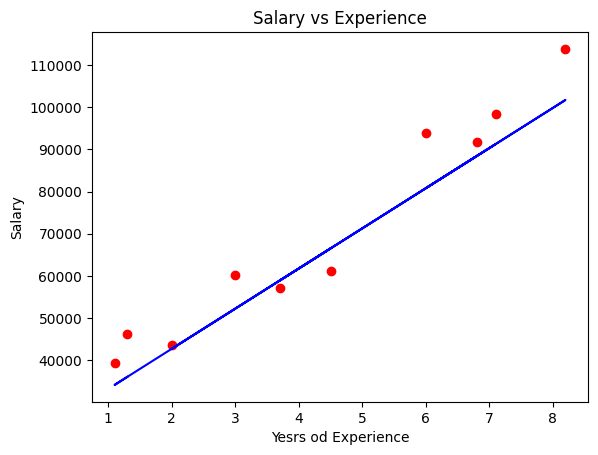

In [34]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction, color='blue')
plt.xlabel('Yesrs od Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()